In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to [0, 1] range and reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Test the model with predictions
predictions = model.predict(X_test[:5])
print("Sample Predictions:")
print(predictions.argmax(axis=1))  # Print predicted labels for first 5 test samples


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8442 - loss: 0.4754 - val_accuracy: 0.9797 - val_loss: 0.0668
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.9735 - loss: 0.0905 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9832 - loss: 0.0580 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9883 - val_loss: 0.0442
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9914 - val_loss: 0.0320
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9908 - val_loss: 0.0356
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9923 -

In [4]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


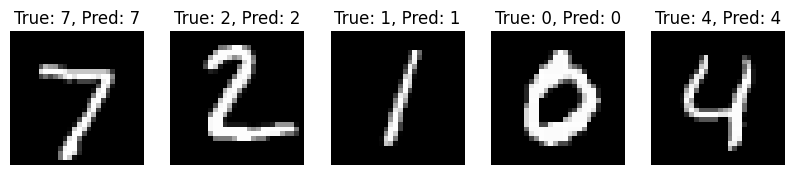

In [5]:
# Test the model with predictions
predictions = model.predict(X_test[:5])

# Plotting some samples with original and predicted labels
def plot_samples(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(true_labels[i])}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Display the first 5 test samples with their true and predicted labels
plot_samples(X_test[:5], y_test[:5], predictions.argmax(axis=1))